# 2-D Ising Model

We will investigate the 2-d Ising model with Monte Carlo methods. Since there are many internal iterations, it is much faster to run in `C++` with `swig`. 

### Compile with swig

In [1]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

### Import from swig

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt

# A.

In [3]:
J = 1.0
T = 2.0
H = 0.0

Lvals = [5,15,25,35,45,55]
Nvals = [100,300,500,700,900,1100]

L_grid, N_grid = np.meshgrid(Lvals, Nvals, indexing='ij')
M_grid = np.zeros_like(L_grid, dtype=float)
E_grid = np.zeros_like(L_grid, dtype=float)

MCSteps = 10000

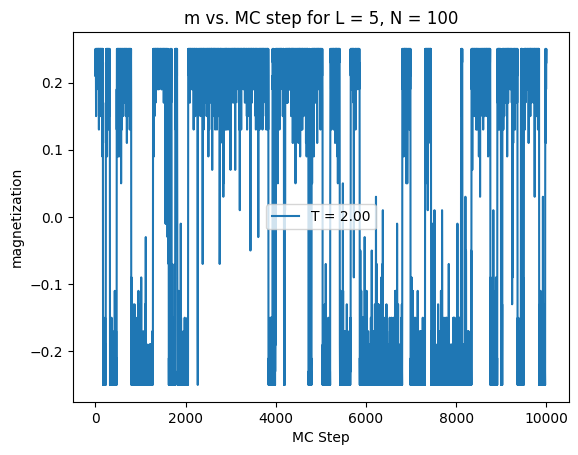

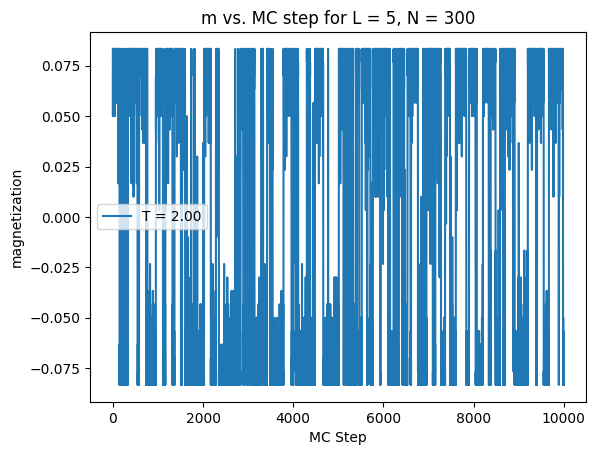

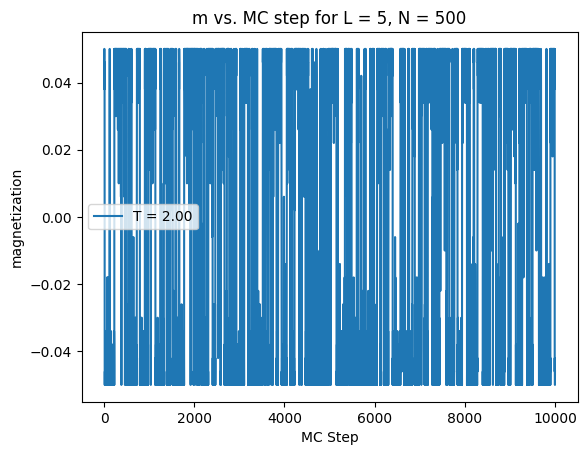

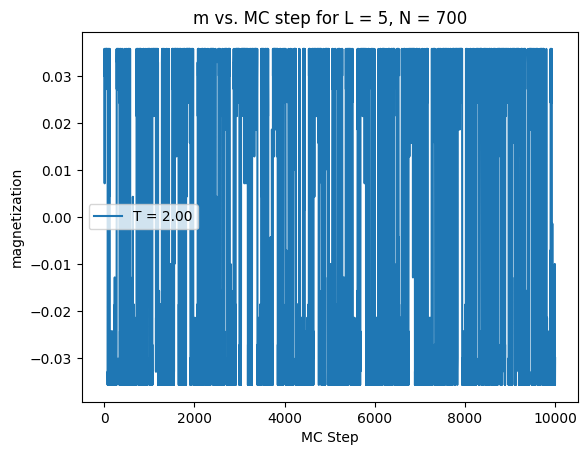

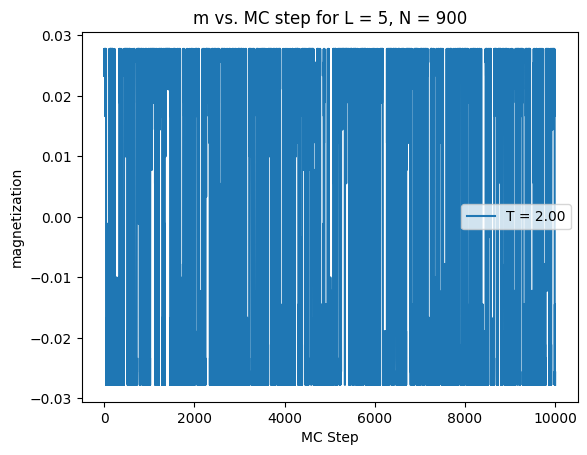

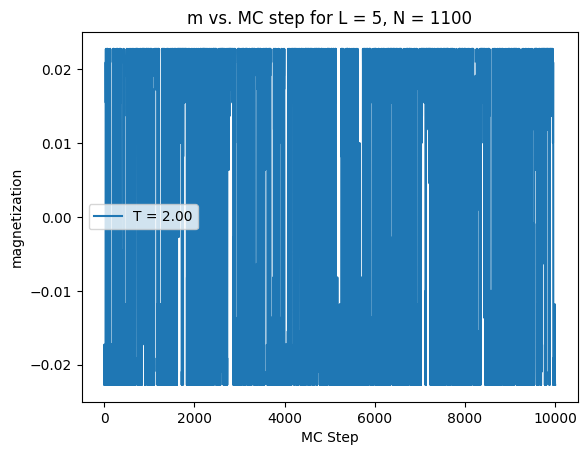

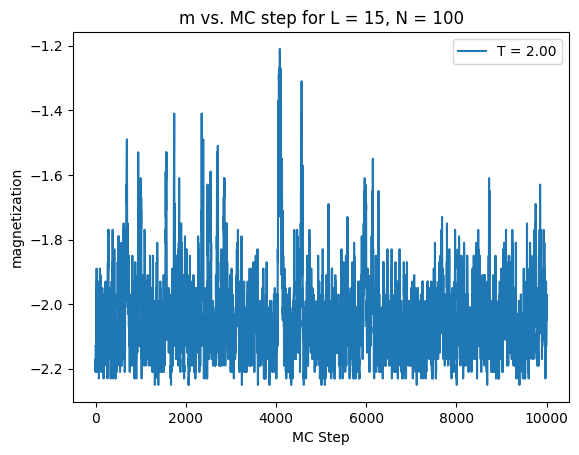

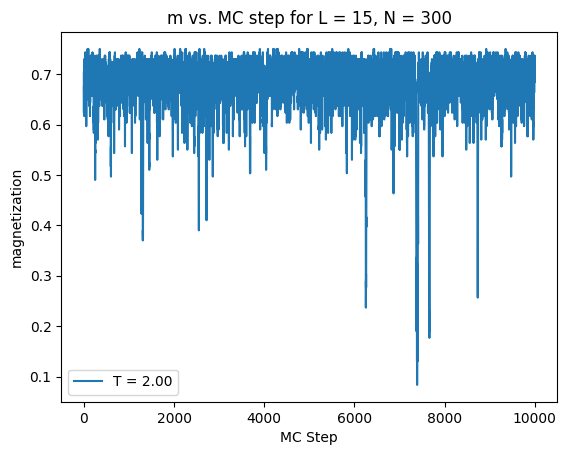

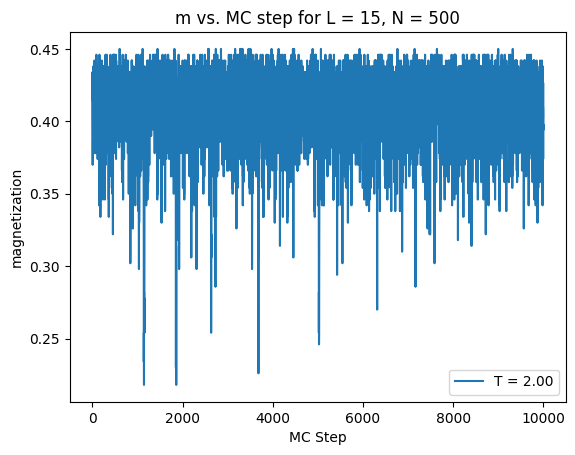

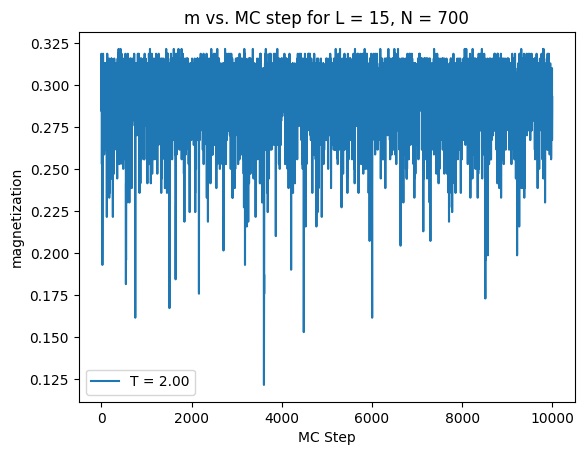

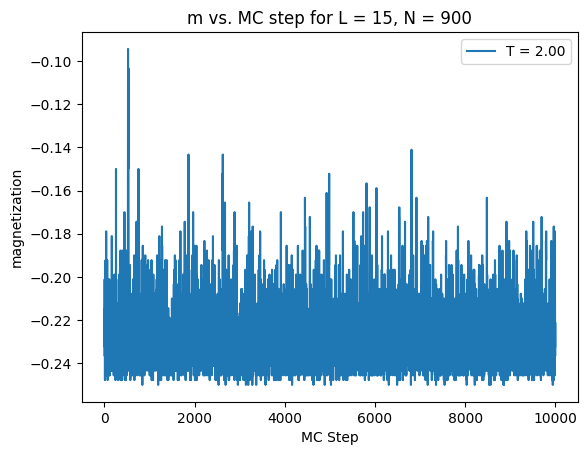

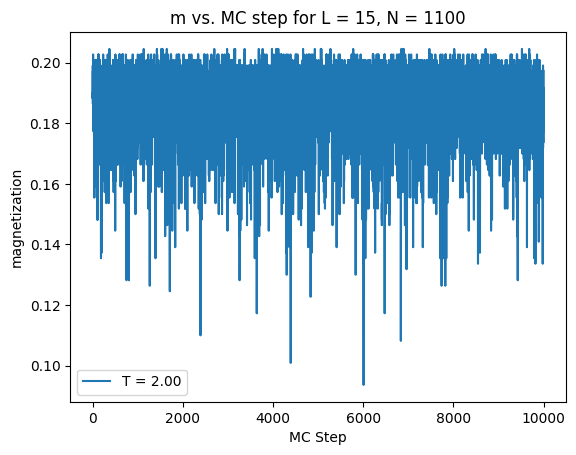

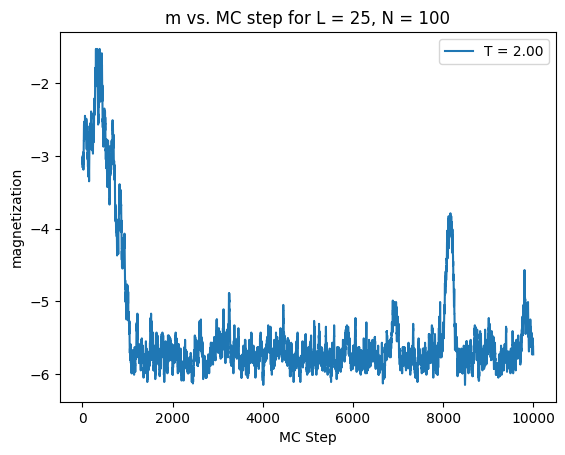

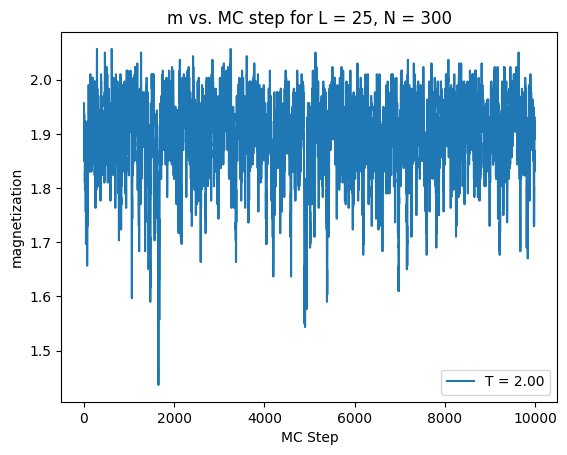

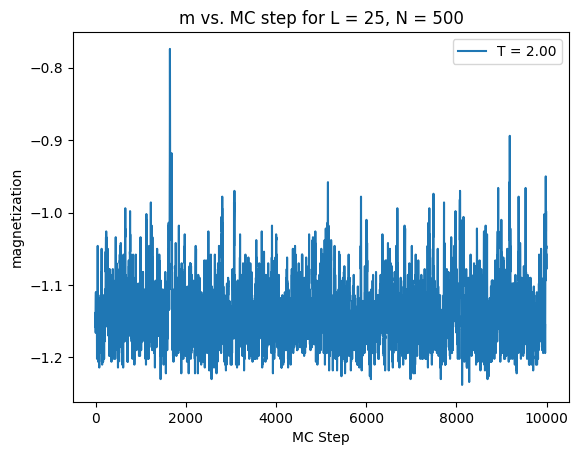

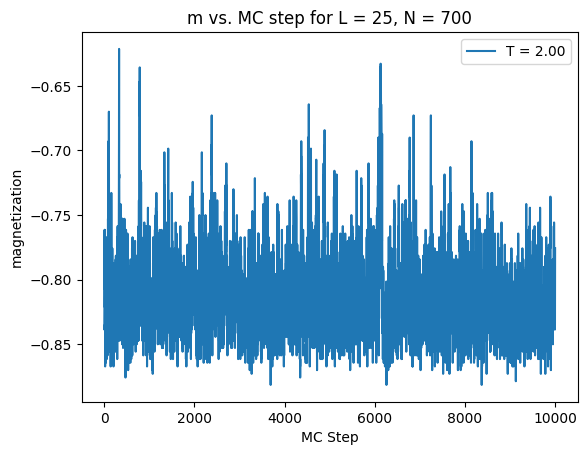

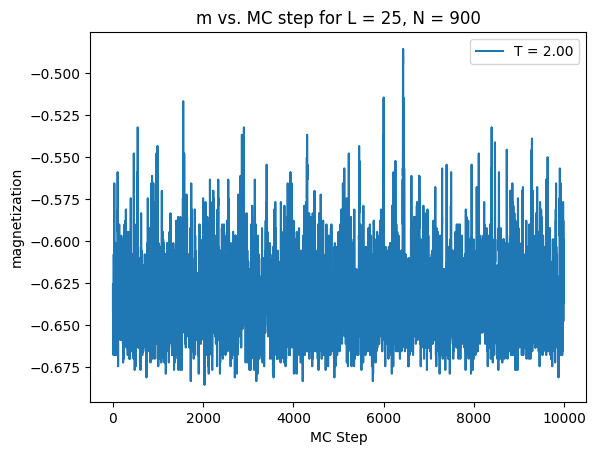

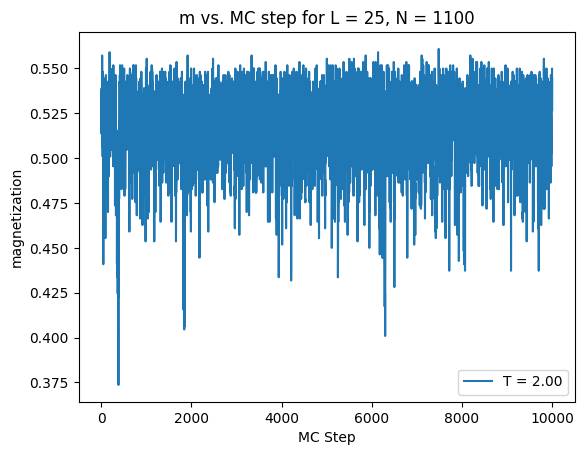

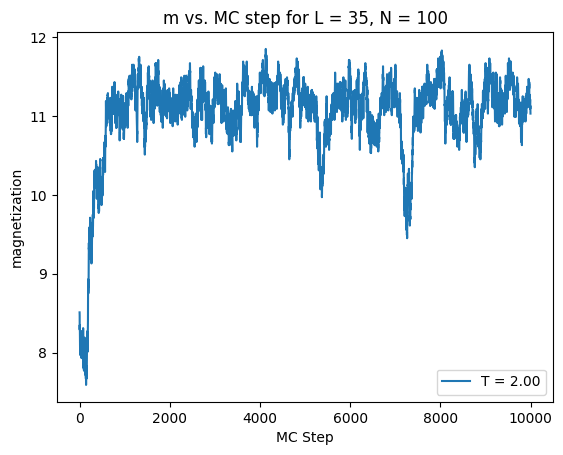

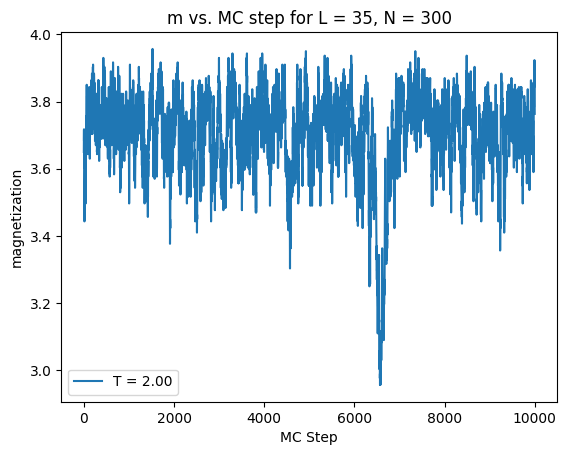

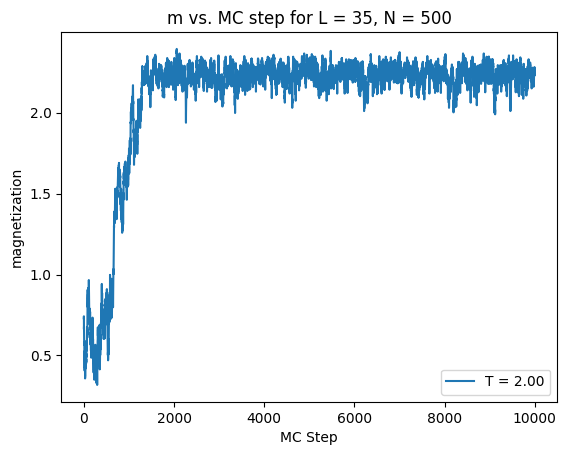

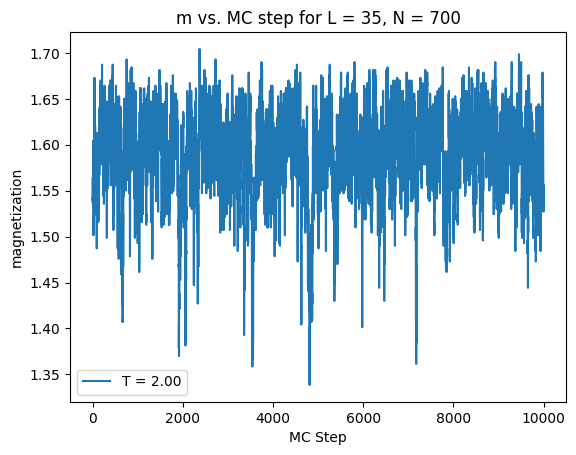

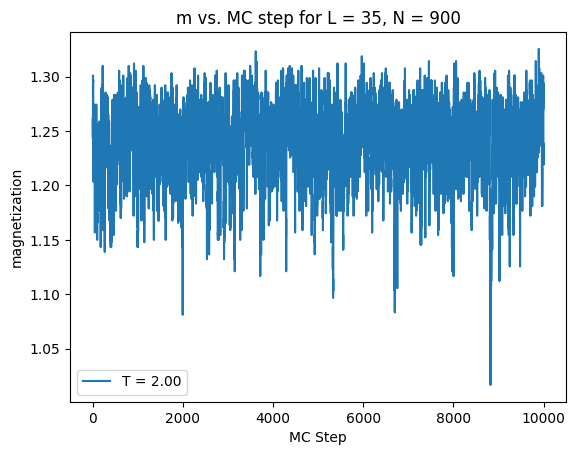

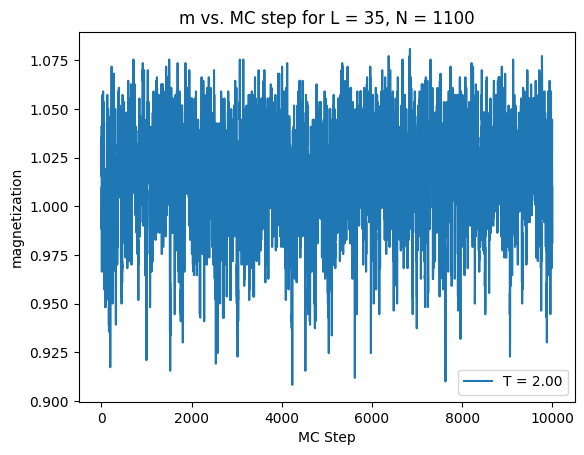

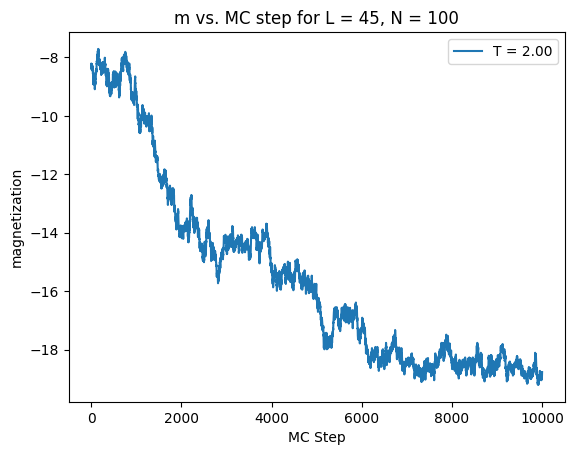

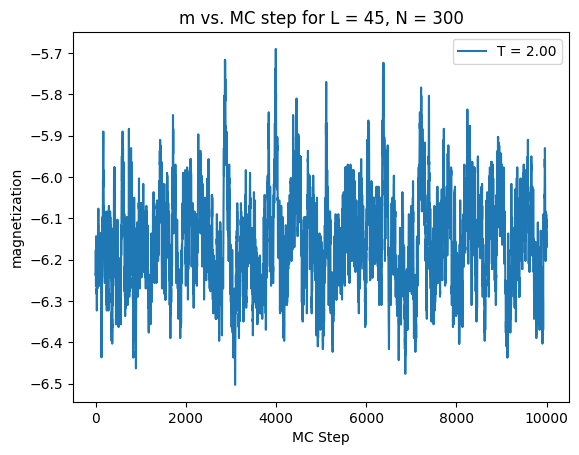

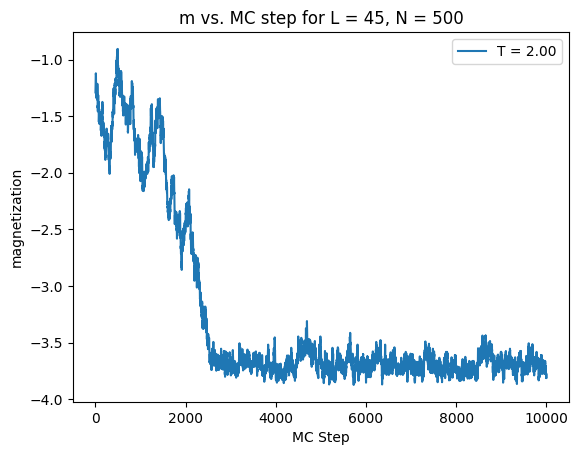

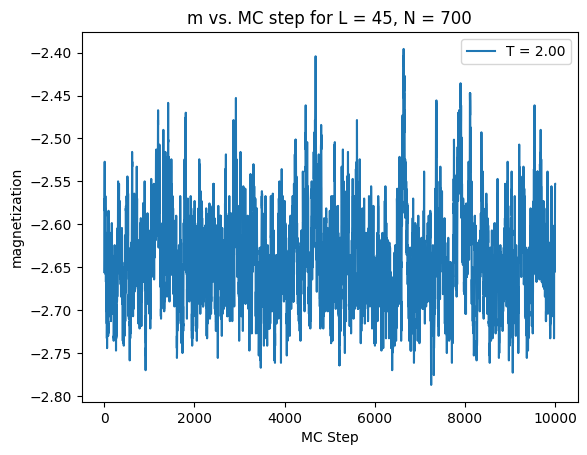

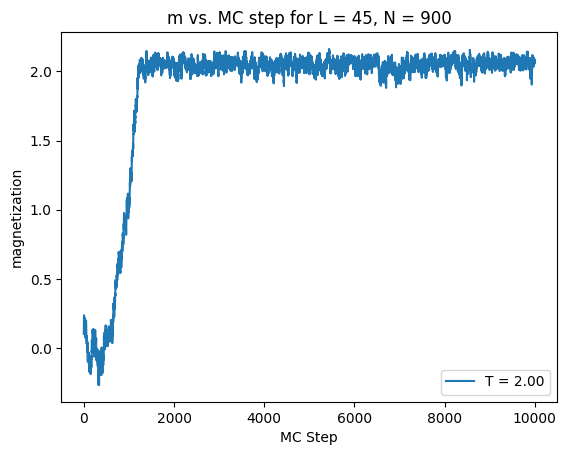

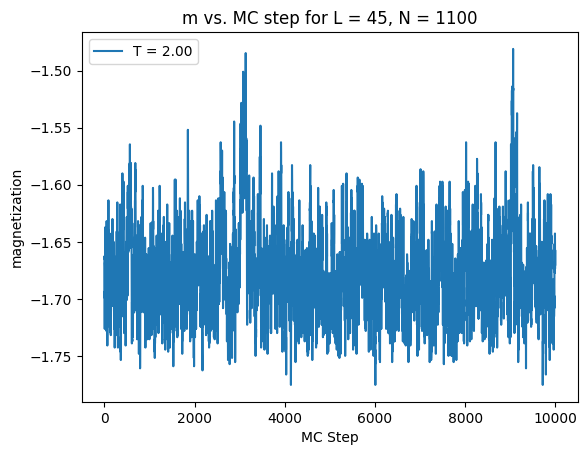

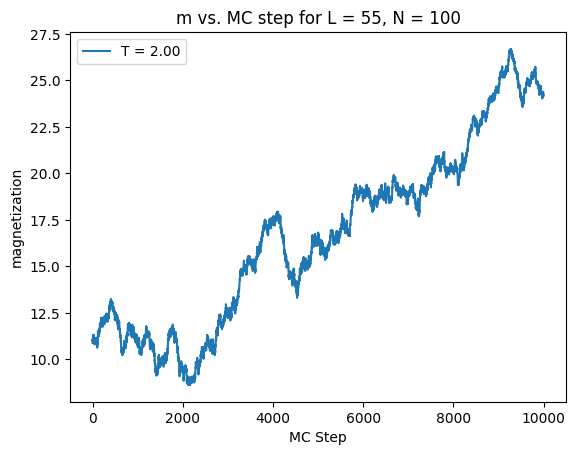

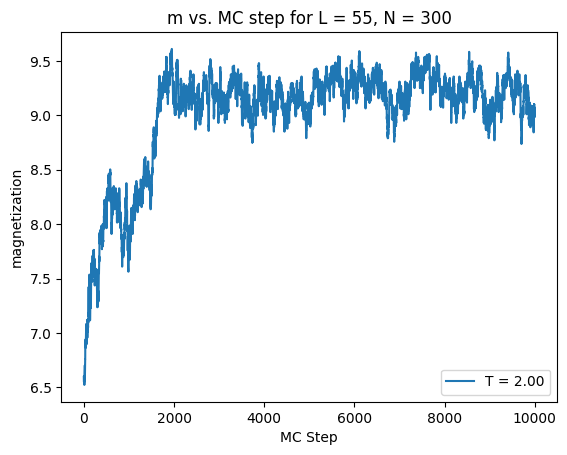

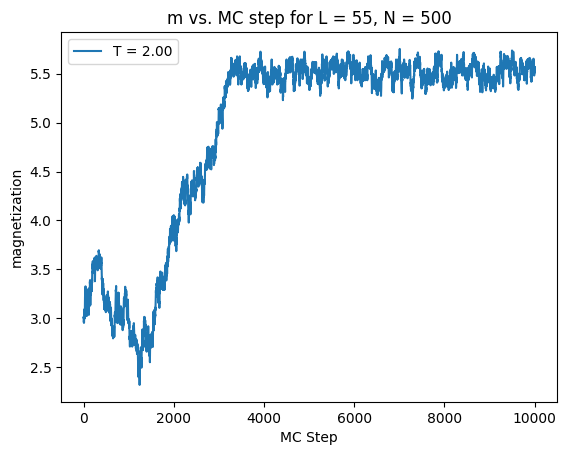

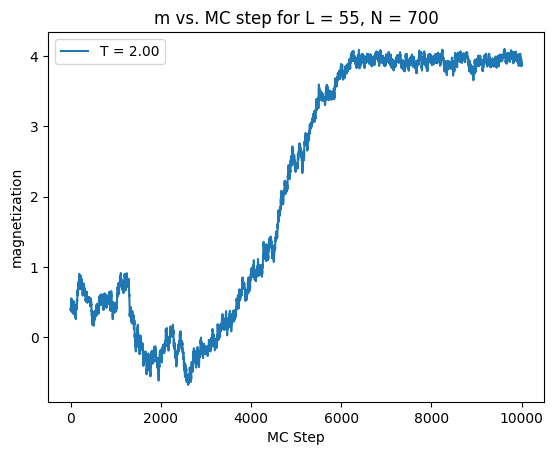

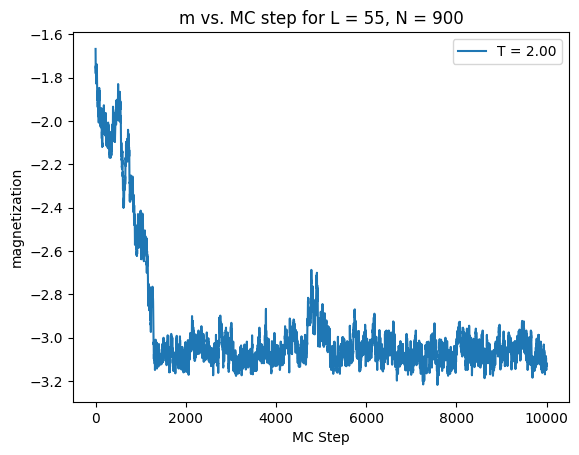

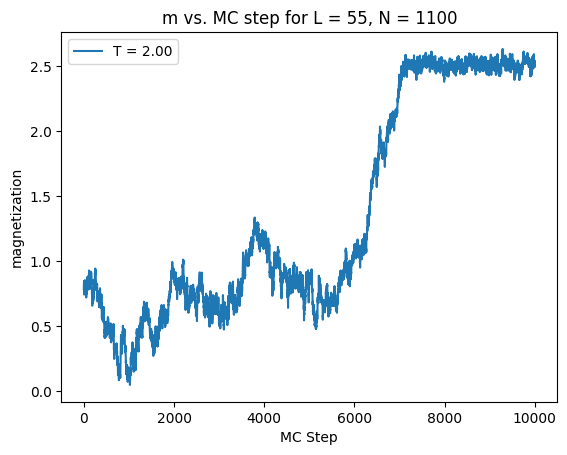

In [4]:
for j in range(len(Lvals)):
    for k in range(len(Nvals)):
        i = ising.Ising(iL = Lvals[j], iN = Nvals[k])
        i.run(MCSteps)
        mvals = i.get_mvals()
        plt.plot(mvals, label="T = %3.2f" % T)
        M_grid[j, k] = i.get_mAvg()
        E_grid[j, k] = i.get_eAvg()

        plt.xlabel("MC Step")
        plt.ylabel("magnetization")
        plt.title(f"m vs. MC step for L = {Lvals[j]}, N = {Nvals[k]}")
        # plt.ylim(-1, 1)
        plt.legend()
        plt.show()

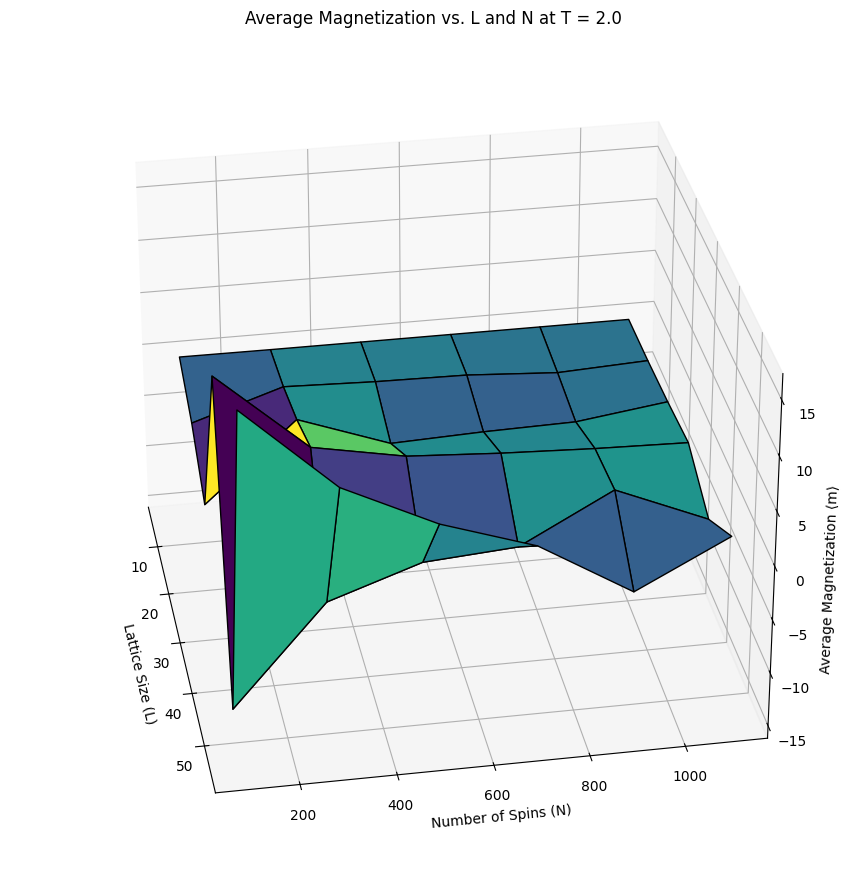

In [5]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(L_grid, N_grid, M_grid, cmap='viridis', edgecolor='k')

ax.set_xlabel("Lattice Size (L)")
ax.set_ylabel("Number of Spins (N)")
ax.set_zlabel("Average Magnetization ⟨m⟩")
ax.set_title("Average Magnetization vs. L and N at T = 2.0")

ax.view_init(elev=30, azim=-10)

plt.tight_layout()
plt.show()

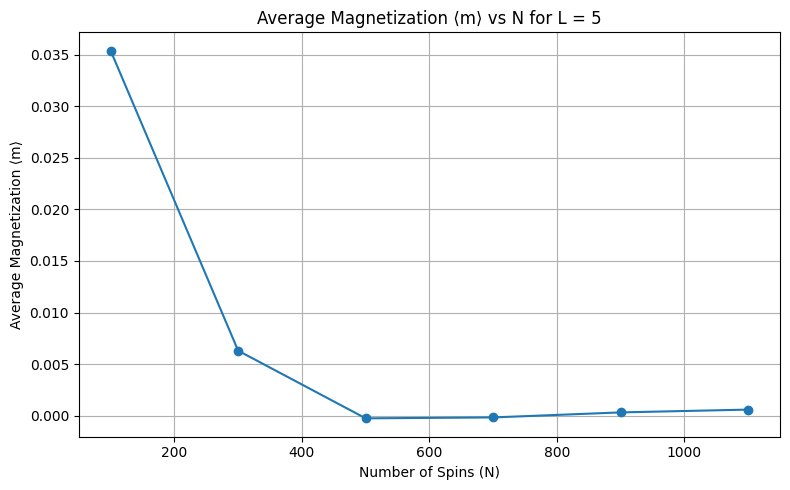

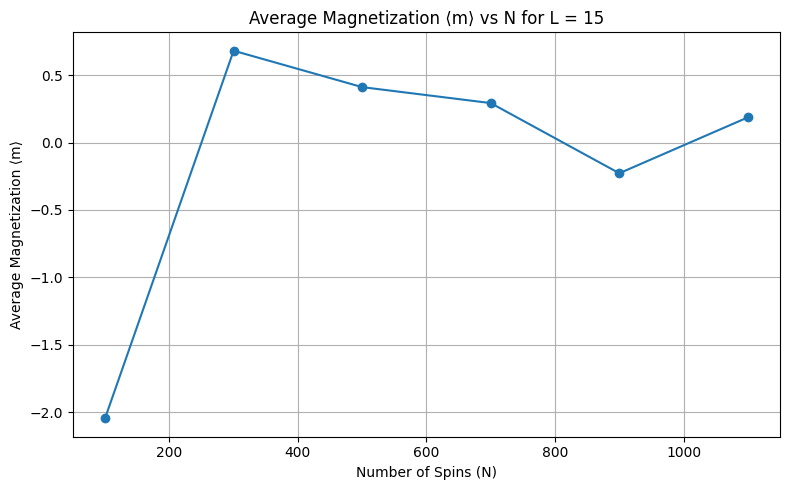

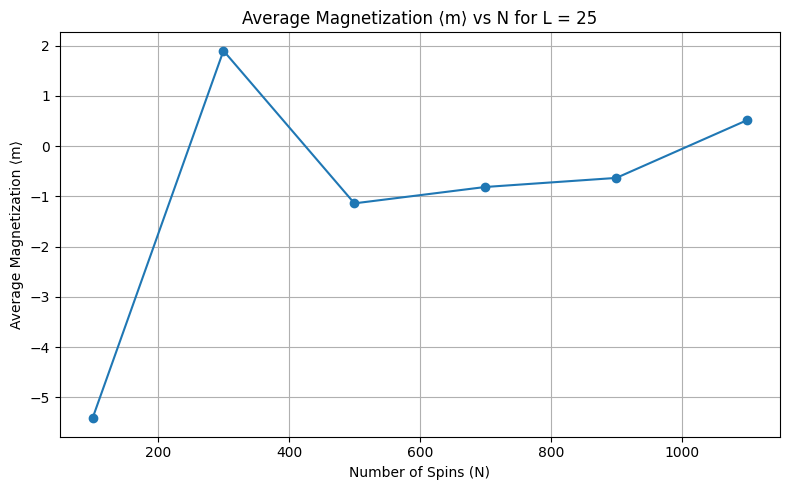

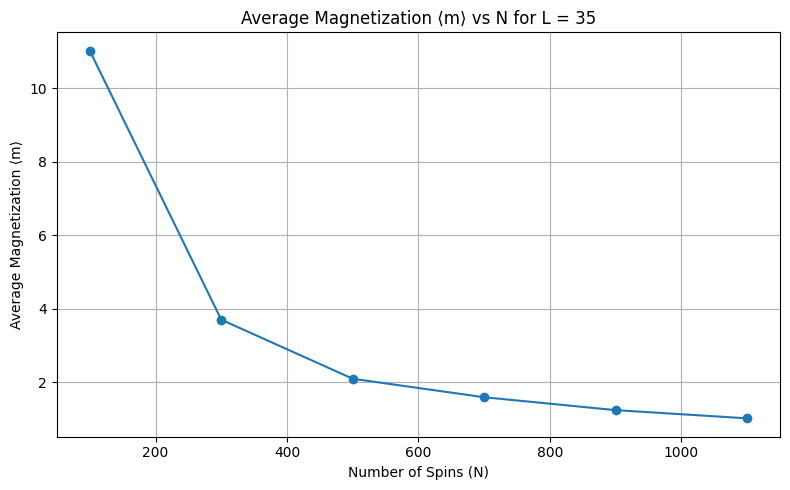

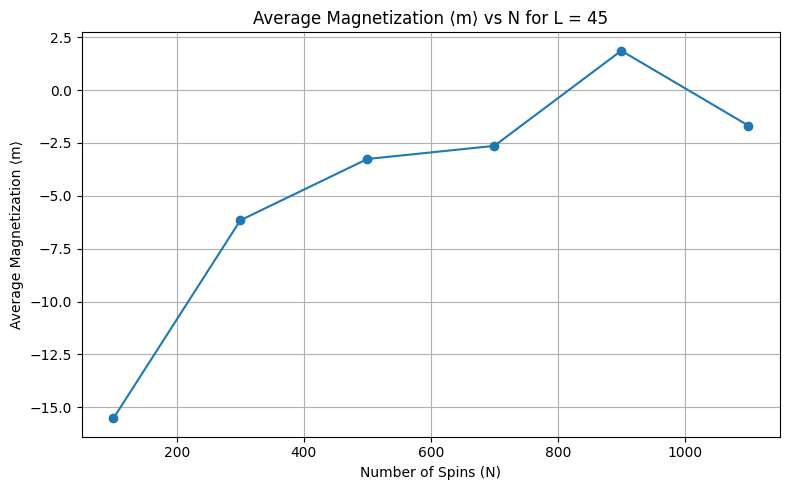

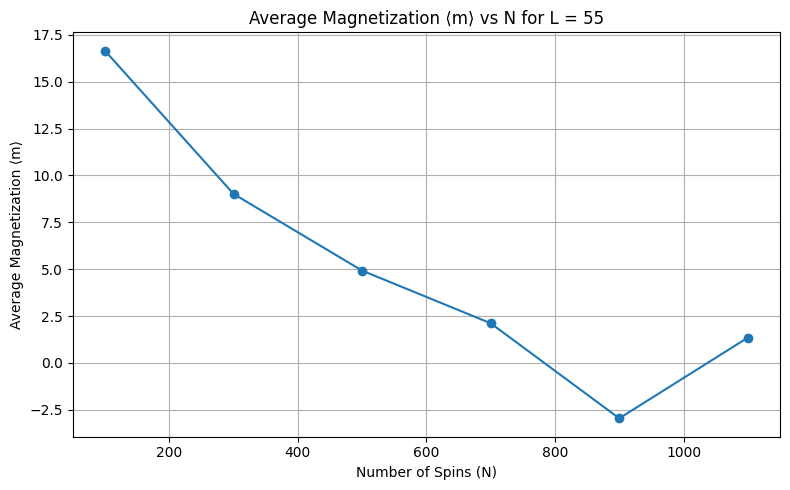

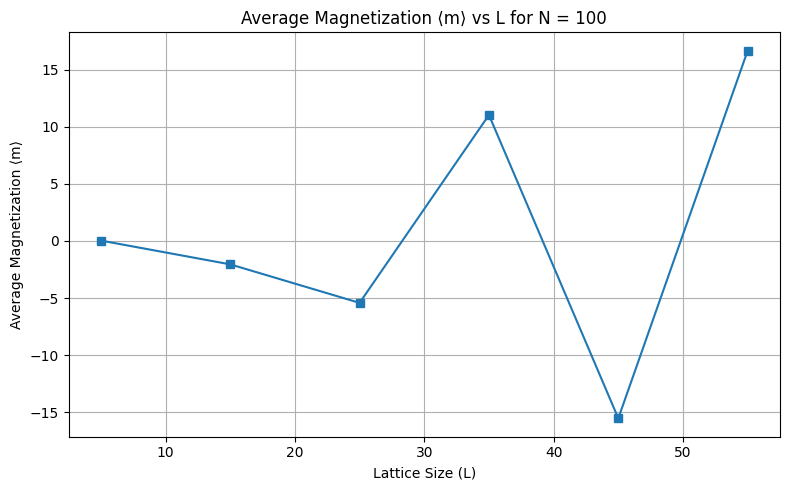

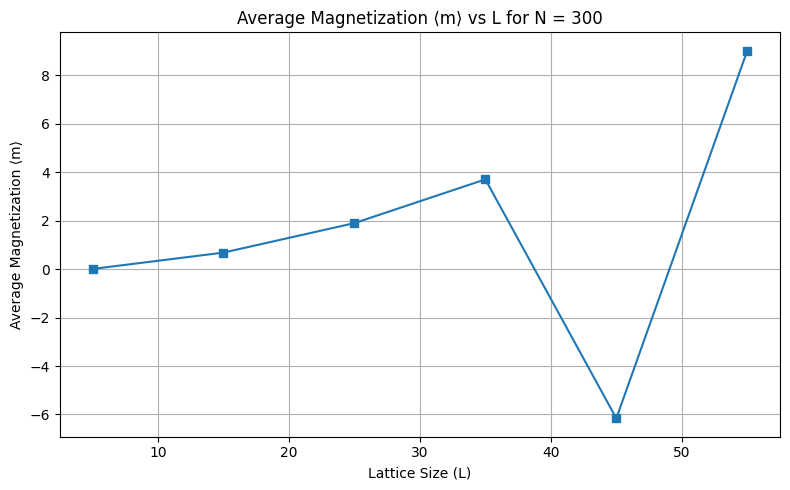

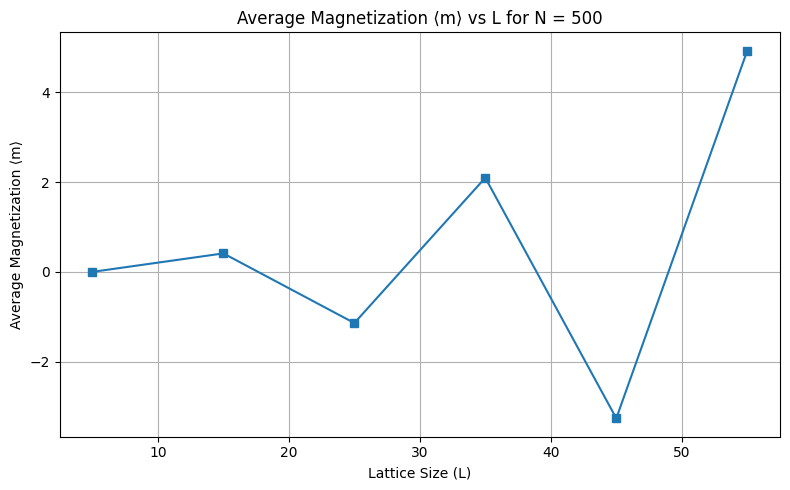

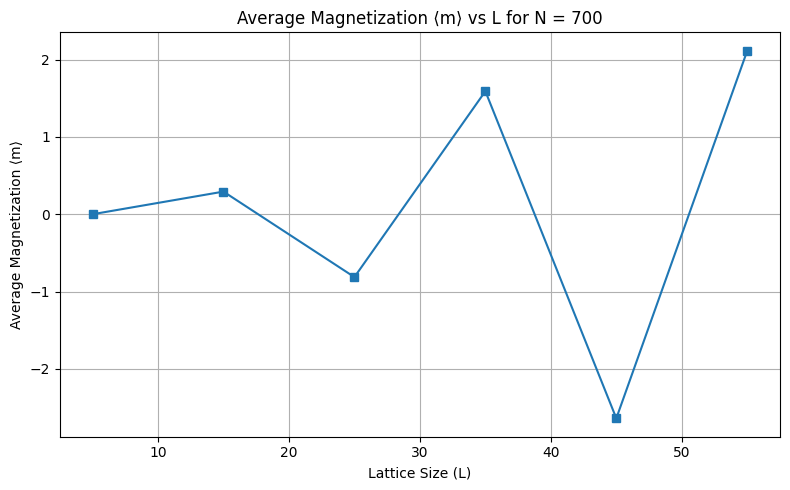

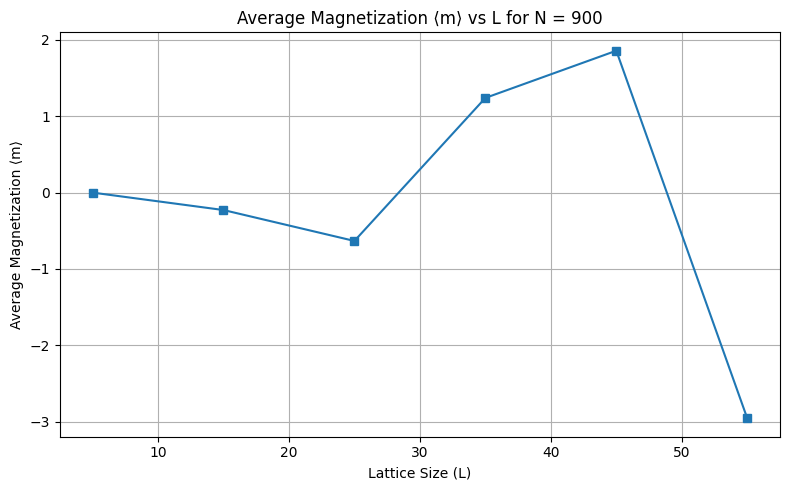

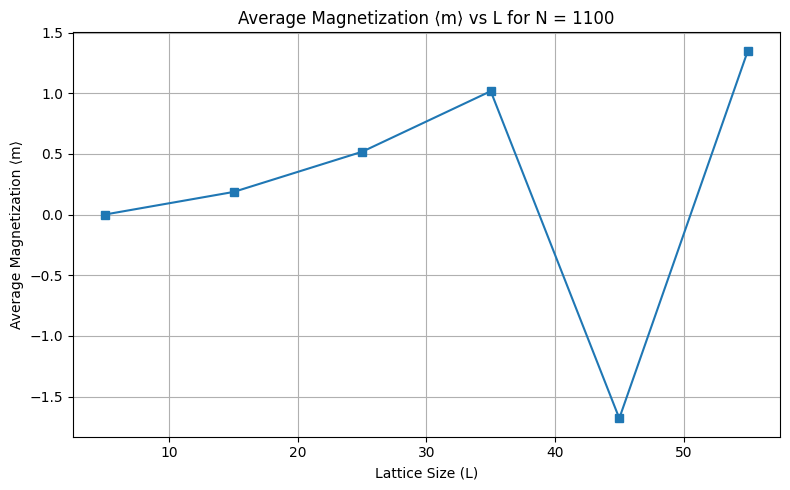

In [6]:
# Plotting avg(m) vs N for each fixed L
for j, L in enumerate(Lvals):
    plt.figure(figsize=(8, 5))
    plt.plot(Nvals, M_grid[j, :], marker='o')
    plt.title(f"Average Magnetization ⟨m⟩ vs N for L = {L}")
    plt.xlabel("Number of Spins (N)")
    plt.ylabel("Average Magnetization ⟨m⟩")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting avg(m) vs L for each fixed N
for k, N in enumerate(Nvals):
    plt.figure(figsize=(8, 5))
    plt.plot(Lvals, M_grid[:, k], marker='s')
    plt.title(f"Average Magnetization ⟨m⟩ vs L for N = {N}")
    plt.xlabel("Lattice Size (L)")
    plt.ylabel("Average Magnetization ⟨m⟩")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# B.

The above graphs highly suggest that a compromise between $L \space \& \space N$ needs to be in effect to ensure the maintainance of a single domain of $\langle m \rangle$.

If we take the MC steps as a measure of time, it's evident that large values for $N$ would admit the least variations of $m$ over time.

Further, for large $L$ while maintaining a moderate density admits a no-flipping scenario.

So, on average, either a constant or a monotonic behavior along with the aforementioned would be sufficient for maintaining a single domain.

Given that, and that for physical considerations we can say that $L\sim\sqrt{N}$, we can safely choose $L=33 \space \& \space N=1100$.

In [15]:
eAvgVals = []
mAvgVals = []
J = 1.0
Tvals = np.linspace(1,3,60)
H = 0.0
L = 33
N = 1100
MCSteps = 10000

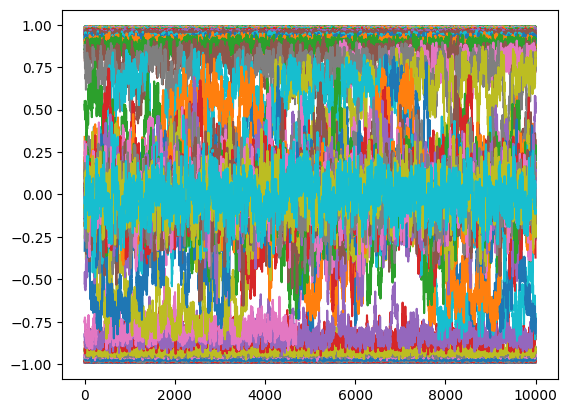

In [16]:
for T in Tvals:
    i = ising.Ising(J, L, N, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    mAvgVals.append( i.get_mAvg() )

Text(0, 0.5, 'Average Magnetization')

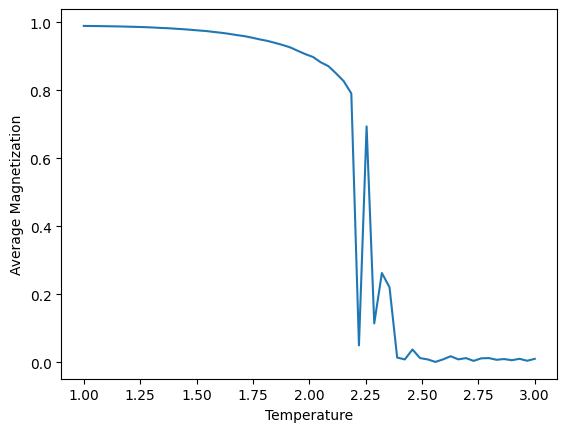

In [17]:
plt.plot(Tvals, np.abs(mAvgVals))
plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")

In [18]:
def magnetization_fit(T, Tc, beta):
    T = np.array(T)
    M = np.zeros_like(T)
    mask = T < Tc
    M[mask] = (Tc - T[mask])**beta
    return M

In [21]:
from scipy.optimize import curve_fit

T_fit = np.array(Tvals)
m_fit = np.abs(np.array(mAvgVals))

popt, pcov = curve_fit(magnetization_fit, T_fit, m_fit, p0=[2.269, 0.125])

Tc_fit, beta_fit = popt

print(Tc_fit, beta_fit)

2.2656826301522806 0.12715117753638513


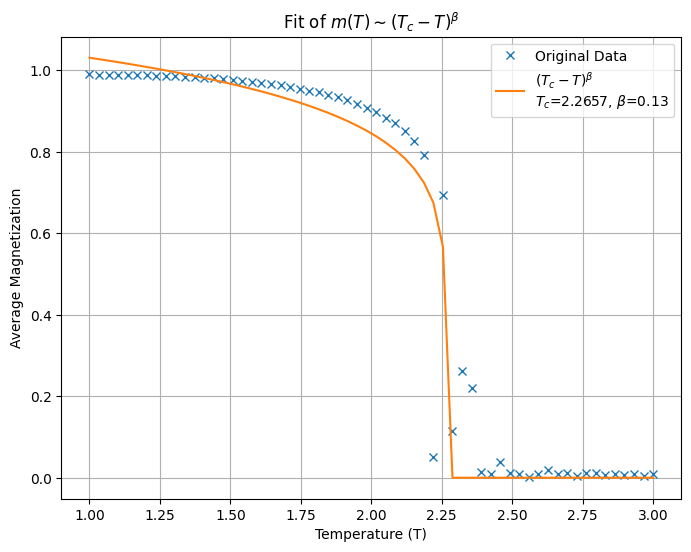

In [22]:
m_fit_data = magnetization_fit(T_fit, Tc_fit, beta_fit)


plt.figure(figsize=(8, 6))
plt.plot(T_fit, m_fit, 'x', label="Original Data")
plt.plot(T_fit, m_fit_data, '-', label=f"$(T_c - T)^\\beta$\n$T_c$={Tc_fit:.4f}, $\\beta$={beta_fit:.2f}")
plt.xlabel("Temperature (T)")
plt.ylabel("Average Magnetization")
plt.title("Fit of $m(T) \\sim (T_c - T)^\\beta$")
plt.legend()
plt.grid(True)
plt.show()


# C.

In [23]:
Energy = np.array(eAvgVals)
C = np.gradient(Energy, T_fit)

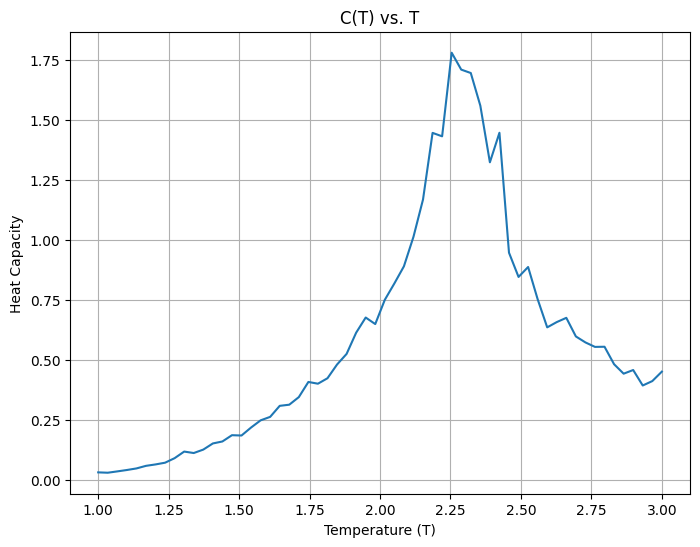

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(T_fit, C, '-')
plt.xlabel("Temperature (T)")
plt.ylabel("Heat Capacity")
plt.title("C(T) vs. T")
plt.grid(True)
plt.show()